Minimum price at Kraken: 9533.9, with a trade volume of 12499.41024581
Maximum price at C-Cex: 10077.0, with a trade volume of 0.72185996
With a difference of 543.1000000000004


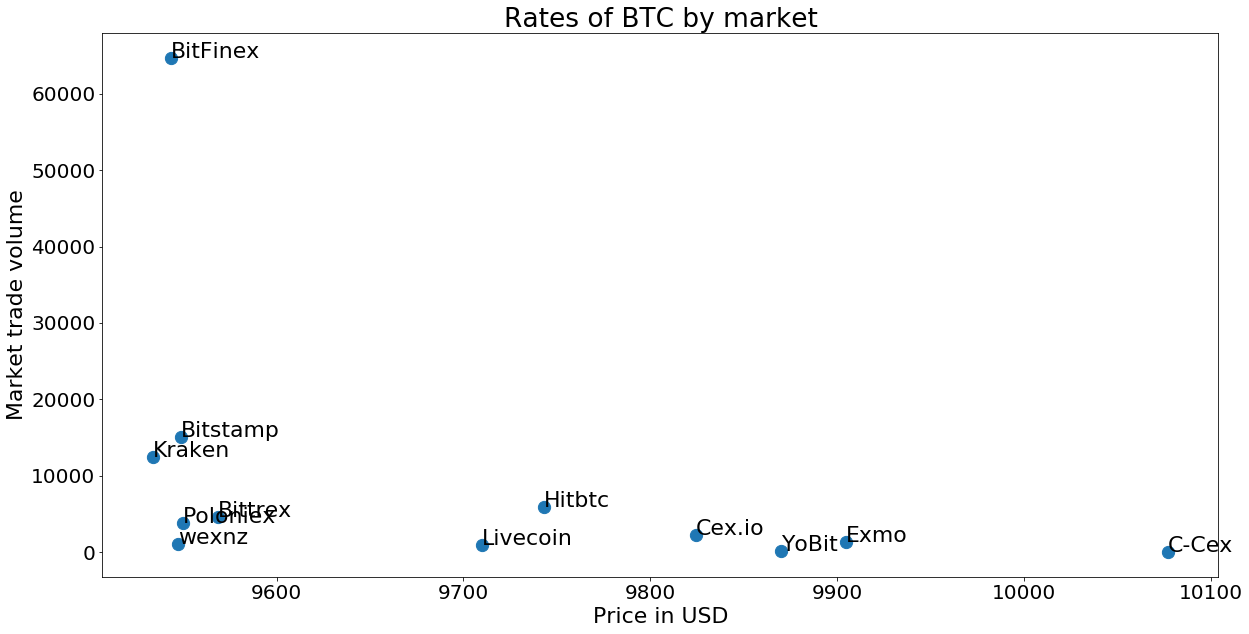

In [20]:
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def marketdiff(crypto = 'btc', fiat = 'usd'):
    url = 'https://api.cryptonator.com/api/full/{}-{}'.format(crypto, fiat)
    df = pd.DataFrame(rq.get('https://api.cryptonator.com/api/full/{}-{}'.format(crypto, fiat)).json()['ticker']['markets'])
    #df = pd.DataFrame(rq.get(url).json()['ticker']['markets'])
    df['price']  = df['price'].astype('float')
    volume, price, market = list(df['volume']),list(df['price']),list(df['market'])  
    plt.figure(figsize=(20,10)), plt.scatter(price, volume, s=150)
    for i, marname in enumerate(market): plt.annotate(marname, (price[i],volume[i])) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    plt.title('Rates of {} by market'.format(str(crypto).upper())); plt.xlabel('Price in '+str(fiat).upper()); plt.ylabel('Market trade volume')
    minlist = df[df['price'] == np.min(df['price'])].values[0]
    maxlist = df[df['price'] == np.max(df['price'])].values[0]
    print('Minimum price at {}: {}, with a trade volume of {}'.format(minlist[0], minlist[1], minlist[2]))
    print('Maximum price at {}: {}, with a trade volume of {}'.format(maxlist[0], maxlist[1], maxlist[2]))
    print('With a difference of {}'.format(maxlist[1]-minlist[1]))
    plt.show()
    

marketdiff('btc', 'usd')


